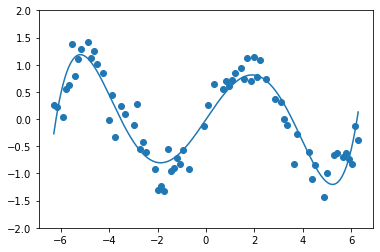

In [129]:
import util
import numpy as np
import matplotlib.pyplot as plt

np.seterr(all='raise')


factor = 2.0

class LinearModel(object):
  """Base class for linear models.
  
   Attributes:
    theta: np.ndarray, dtype=np.float64, shape=(n_features,). Weights vector for
      the model.
  """

  def __init__(self, theta=None):
    """
    Args:
      theta: (See class definition)
    """
    self.theta = theta

  def fit(self, x, y):
    """Fits the linear model to x -> y using np.linalg.solve.

    Remember to update self.theta with the fitted model parameters.

    Args:
      x: np.ndarray, dtype=np.float64, shape=(n_examples, n_features). Inputs.
      y: np.ndarray, dtype=np.float64, shape=(n_examples,). Outputs.

    Returns: Nothing
    """
    # *** START CODE HERE ***
    self.theta = np.transpose(np.matrix(np.linalg.solve(np.dot(np.transpose(x),x),np.dot(np.transpose(x),y))))
    # *** END CODE HERE ***

  def predict(self, x):
    """ Makes a prediction given a new set of input features.

    Args:
      x: np.ndarray, dtype=np.float64, shape=(n_examples, n_features). Model input.

    Returns: np.float64. Model output.
    """
    # *** START CODE HERE ***     
    y = np.zeros(x.shape[0])    
    y = np.dot(x, self.theta)
    return y
    # *** END CODE HERE ***

  @staticmethod
  def create_poly(k, x):
    """ Generates polynomial features of the input data x.

    Args:
      x: np.ndarray, dtype=np.float64, shape=(n_examples,). Training inputs.
    
    Returns: np.ndarray, dtype=np.float64, shape=(n_examples, k+1). Polynomial
      features of x with powers 0 to k (inclusive).
    """
    # *** START CODE HERE ***    
    b = np.zeros([x.shape[0],k+1])
    b[:,0] = np.ones(x.shape[0])
    for i in range(k):
        b[:,i+1]=x[:,0]**(i+1)
    return b
    # *** END CODE HERE ***

  @staticmethod
  def create_sin(k, x):
    """ Generates sine and polynomial features of the input data x.

    Args:
      x: np.ndarray, dtype=np.float64, shape=(n_examples,). Training inputs.
    
    Returns: np.ndarray, dtype=np.float64, shape=(n_examples, k+2). Sine (axis
      0) and polynomial (axes 1 to k+1) features of x with powers 0 to k
      (inclusive).
    """
    pass
    # *** START CODE HERE ***
    a = np.zeros([x.shape[0],k+2])
    a[:,0] = np.sin(x[:,0])
    a[:,1] = np.ones(x.shape[0])
    for i in range(k):
        a[:,i+2]=x[:,0]**(i+1)
    return a
    # *** END CODE HERE ***

def run_exp(train_path, sine=False, ks=[1, 2, 3, 5, 10, 20], filename='plot.png'):
  train_x,train_y=util.load_dataset(train_path,add_intercept=False)
  plot_x = np.ones([1000, 1])
  plot_x[:, 0] = np.linspace(-factor*np.pi, factor*np.pi, 1000)
  plt.figure()
  plt.scatter(train_x, train_y)

  for k in ks:
      '''
      Our objective is to train models and perform predictions on plot_x data
      '''
      # *** START CODE HERE ***
      if sine == True:
         b = np.zeros([plot_x.shape[0],k+2])
         b[:,0] = np.sin(plot_x[:,0])
         b[:,1] = np.ones(plot_x.shape[0])
         for i in range(k):
              b[:,i+2]=plot_x[:,0]**(i+1)
        
         model = LinearModel()
         sinusoid = model.create_sin(k,train_x)
         model.fit(sinusoid,train_y)
         plot_y = model.predict(b)
      else:
         b = np.zeros([plot_x.shape[0],k+1])
         b[:,0] = np.ones(plot_x.shape[0])
         for i in range(k):
            b[:,i+1]=plot_x[:,0]**(i+1)
            
         model = LinearModel()
         polynomial = model.create_poly(k,train_x)
         model.fit(polynomial,train_y)
         plot_y = model.predict(b)
      # *** END CODE HERE ***
      '''
      Here plot_y are the predictions of the linear model on the plot_x data
      '''
      plt.ylim(-2, 2)
      plt.plot(plot_x[:, 0], plot_y, label='k=%d' % k)  

plt.legend()
plt.savefig(filename)
plt.clf()


def main(train_path, small_path, eval_path):
  '''
  Run all experiments
  '''
  # *** START CODE HERE ***
  run_exp(train_path, False, [3], 'large-poly3.png')
  run_exp(train_path, True, [1, 2, 3, 5, 10, 20], 'large-sine.png')
  run_exp(train_path, False, [1, 2, 3, 5, 10, 20], 'large-poly.png')
  run_exp(small_path, True, [1, 2, 3, 5, 10, 20], 'small-sine.png')
  run_exp(small_path, False, [1, 2, 3, 5, 10, 20], 'small-poly.png') 
  # *** END CODE HERE ***

if __name__ == '__main__':
  main(train_path='train.csv',
     small_path='small.csv',
    eval_path='test.csv')
